In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Exercise 1 (2 x 12.5 points

A data scientist develops a model of the mortality probability distribution function

$p(t) = 3 \times 10^{-9} t^2(100-t)^2, 0 \le t \le 100 ~\text{years}$

$p(t)$ is 0.0 outside the above range of $t$.

###a. What is the probability that a person will die between 60 and 70.

$P(60 \le X \le 70) = P(X \le 70) - P(X \le 60)$
<br><br>
$\int_{60}^{70} 3 \times 10^{-9}t^2(100-t^2)$

$= \frac{1}{5000000000}((3(70)^5-750(70)^4+50000(70)^3)-(3(60)^5-750(60)^4+50000(60)^3)$

$= 0.15436$
<br><br>
Probability that a person might die between the ages 60 and 70 is roughly 15%

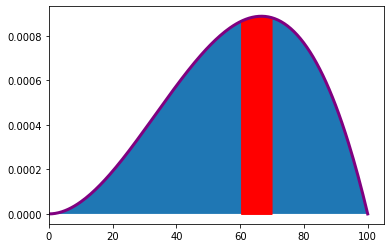

In [ ]:
def pOfT(xvals):
  return (3 * 10 ** -9) * (xvals ** 2) * (100 - xvals)*2

xvals = np.linspace(0,100,200)
yvals = pOfT(xvals)

plt.xlim(0,105)
plt.plot(xvals, yvals, color = "purple", linewidth=3)
plt.fill_between(xvals, yvals)
plt.fill_between(xvals[120:140], yvals[120:140], color = "red")


###b. What is the probability that a person will die between 60 and 70, given that was alive at 60.

$P(60 \le X \le 70 | X \ge 60) = \frac{P(X \le 70) - P(X \le 60)}{P(X \ge 60)}$
<br><br>
$P(X \le 70) - P(X \le 100) = 0.15436$
<br><br>
$P(X \ge 60) = $

$\int_{60}^{100} 3 \times 10^{-9}t^2(100-t)^2$

$= \frac{1}{5000000000}((3(100)^5-750(100)^4+50000(100)^3)-(3(60)^5-750(60)^4+50000(60)^3)$

$= 0.31744$

$0.15436/0.31744 = 0.48626$
<br><br>
Probability that a person might die between the ages 60 and 70, given that was alive at 60 is roughly 49%

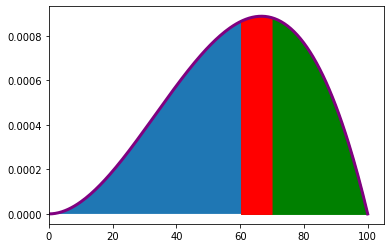

In [ ]:
plt.xlim(0,105)
plt.plot(xvals, yvals, color = "purple", linewidth=3)
plt.fill_between(xvals, yvals)
plt.fill_between(xvals[120:200], yvals[120:200], color = "green")
plt.fill_between(xvals[120:140], yvals[120:140], color = "red")


#Exercise 2 (2 x 12.5 points)

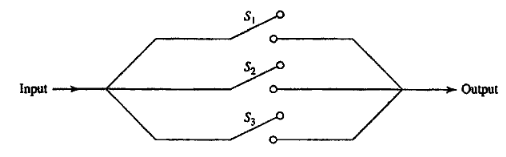


Three switches connected in parallel operate independently. Each switch remains closed with probability $p$.

###a. Find the probability of receiving an input signal at the output.
<br><br>
Switch $S_i$ state 0 = open, 1 = closed. $P(S_i = 1) = p$

Output $O$ state 1 = signal recieved, 0 = signal not recieved
<br><br>
$P(O = 1) = P(S_1 = 1) \cup P(S_2 = 1) \cup P(S_3 = 1)$

$= 1-(1-p)^3$

$= 3p-3p^2+p^3$

Probability of receiving an input signal at the output is $3p-3p^2+p^3$

###b. Find the probability that switch $S_i$ is open given that an input signal is received at the output.
<br><br>

$P(S_i = 0|O=1) = \frac{P(O = 1|S_i=0)P(S_i = 0)}{P(O = 1)}$

$P(O = 1|S_i=0) = (2p-p^2)$

P(S_i = 0) = (1-p)
So then:

$\frac{P(O = 1|S_i=1)P(S_i = 1)}{P(O = 1)} = \frac{(2p-p^2)(1-p)}{(3p-3p^2+p^3)}$

Probability that switch $S_i$ is open given that an input signal is received at the output is $\frac{(2p-p^2)(1-p)}{(3p-3p^2+p^3)}$

#Exercise 3 (2 x 12.5 points)

###a. Calculate the probability of the counts of outcome “2” if the possible equally probable outcomes are all integer numbers between 1 and 10 and we performed $n=1000$ trials.

$E(X_i) = np_i$

$Var(X_i) = np_i(1-p_i)$

$E(X_2) = 1000*0.1 = 100$

$Var(X_n)=1000*0.1(1-0.1)=90$

$f(X_2) = \frac{1}{\sqrt{90*2\pi}}e^{-\frac{1}{2}(\frac{x-100}{\sqrt{90}})^2}$

###b. Simulate n independent trials of the multinoulli (categorical distribution) compliant to the specification of (a). Plot the probability in (a) as a function of n independent trials (n=10-1000). Write your conclusions with respect to the behavior of the estimated probability as $n$ increases.

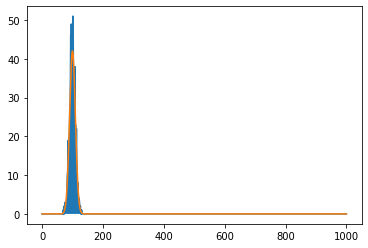

In [ ]:
def X_2pdfPrediction(xvals):
  return 1000*(1/(np.sqrt(90*2*np.pi)))*np.e**((-0.5)*((xvals-100)/(np.sqrt(90)))**2)

def trial(n):
  a = np.random.randint(1,11,n)
  return np.count_nonzero(a == 2)

n = 1000

xvals = np.linspace(0,n,n)
xvalsPrediction = X_2pdfPrediction(xvals)
trialResults = [0]*n
for i in range(0,n):
  trialResults[trial(n)]+=1


plt.plot(xvals, trialResults)
plt.fill_between(xvals,trialResults,0)
plt.plot(xvals, xvalsPrediction)

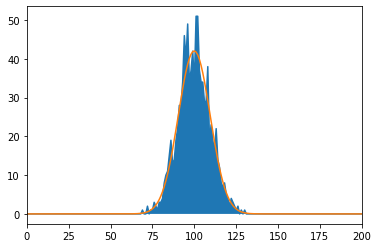

In [ ]:
plt.xlim(0,n/5)

plt.plot(xvals, trialResults)
plt.fill_between(xvals,trialResults,0)
plt.plot(xvals, xvalsPrediction)

#Exercise 4 (25 points)

###Replicate the Figure 1 plots of [this](http://hosting.astro.cornell.edu/~cordes/A6523/GeneratingCorrelatedRandomVariables.pdf) writeup.

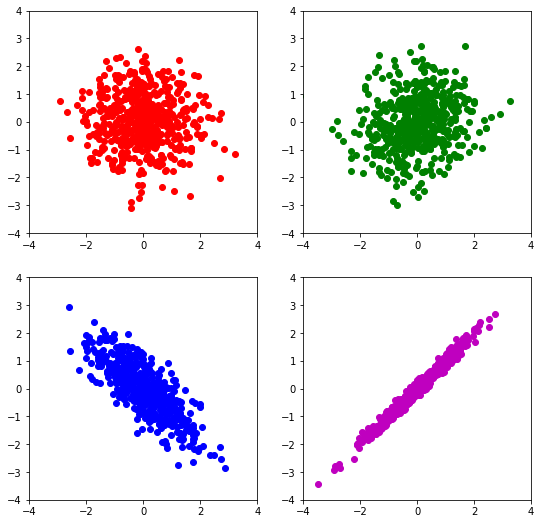

In [ ]:
mu = [0,0]
s1 = 1
s2 = 1

plt.subplots(2,2, figsize = (9,9))

plt.subplot(2,2,1)
p = 0
cov = [[s1**2, s1*s2*p], 
       [s1*s2*p, s2**2]]
resultSet = np.random.multivariate_normal(mu, cov,(500))
resultSetx,resultSety = zip(*resultSet)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot(resultSetx,resultSety,"ro")

plt.subplot(2,2,2)
p = 0.2
cov = [[s1**2, s1*s2*p], 
       [s1*s2*p, s2**2]]
resultSet = np.random.multivariate_normal(mu, cov,(500))
resultSetx,resultSety = zip(*resultSet)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot(resultSetx,resultSety,"go")

plt.subplot(2,2,3)
p = -0.8
cov = [[s1**2, s1*s2*p], 
       [s1*s2*p, s2**2]]
resultSet = np.random.multivariate_normal(mu, cov,(500))
resultSetx,resultSety = zip(*resultSet)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot(resultSetx,resultSety,"bo")

plt.subplot(2,2,4)
p = 0.99
cov = [[s1**2, s1*s2*p], 
       [s1*s2*p, s2**2]]
resultSet = np.random.multivariate_normal(mu, cov,(500))
resultSetx,resultSety = zip(*resultSet)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot(resultSetx,resultSety,"mo")